In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    import warnings
    warnings.filterwarnings('ignore')

In [30]:
df1 = pd.read_csv('ADANIPOWER.csv', parse_dates=True, index_col="Date")
df2 = pd.read_csv('APOLLOTYRE.csv', parse_dates=True, index_col="Date")
df3 = pd.read_csv('GODREJIND.csv', parse_dates=True, index_col="Date")
df4 = pd.read_csv("MINDTREE.csv", parse_dates=True, index_col="Date")
df5 = pd.read_csv('PNB.csv', parse_dates=True, index_col="Date")

In [3]:
print(len(df1))
print(len(df2))

494
494


In [4]:
df1[df1['Series'] == 'EQ']
df2[df2['Series'] == 'EQ']
df3[df3['Series'] == 'EQ']
df4[df4['Series'] == 'EQ']
df5[df5['Series'] == 'EQ']

df5.tail(4)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2019-05-08,PNB,EQ,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44
2019-05-09,PNB,EQ,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83
2019-05-10,PNB,EQ,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94
2019-05-13,PNB,EQ,86.25,86.15,86.20,79.05,79.90,79.80,82.13,34293332,2.816529e+09,88162,7102109,20.71


In [5]:
data = {
    'ADANIPOWER' : df1['Close Price'],
    'APOLLOTYRE' : df2['Close Price'],
    'GODREJIND' : df3['Close Price'],
    'MINDTREE' : df4['Close Price'],
    'PNB' : df5['Close Price']
}

dfn = pd.DataFrame(data)
dfn.tail(10)

,ADANIPOWER,APOLLOTYRE,GODREJIND,MINDTREE,PNB
Date,,,,,
2019-04-26,48.40,209.50,512.55,975.85,88.15
2019-04-30,44.90,206.05,514.35,981.25,84.90
2019-05-02,44.45,202.00,503.60,981.40,86.10
2019-05-03,43.85,201.65,507.20,970.20,87.15
2019-05-06,42.80,197.05,504.15,981.75,86.25
2019-05-07,41.50,195.20,484.30,979.95,83.95
2019-05-08,41.35,191.75,476.10,980.50,83.95
2019-05-09,40.95,185.30,471.30,980.45,84.25
2019-05-10,41.45,190.95,471.20,975.35,86.25


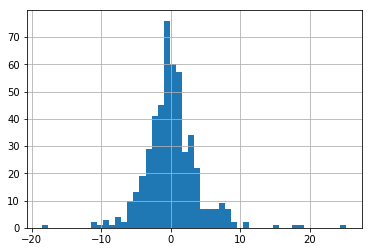

In [6]:
dfnew = dfn.pct_change()* 100
dfnew["ADANIPOWER"].hist(bins = 50)

In [7]:
dfnew.dropna(inplace= True)
dfnew.tail(7)

,ADANIPOWER,APOLLOTYRE,GODREJIND,MINDTREE,PNB
Date,,,,,
2019-05-03,-1.349831,-0.173267,0.714853,-1.141227,1.219512
2019-05-06,-2.394527,-2.281180,-0.601341,1.190476,-1.032702
2019-05-07,-3.037383,-0.938848,-3.937320,-0.183346,-2.666667
2019-05-08,-0.361446,-1.767418,-1.693165,0.056125,0.000000
2019-05-09,-0.967352,-3.363755,-1.008192,-0.005099,0.357356
2019-05-10,1.221001,3.049110,-0.021218,-0.520169,2.373887
2019-05-13,-7.237636,-2.487562,-3.979202,0.384477,-7.478261


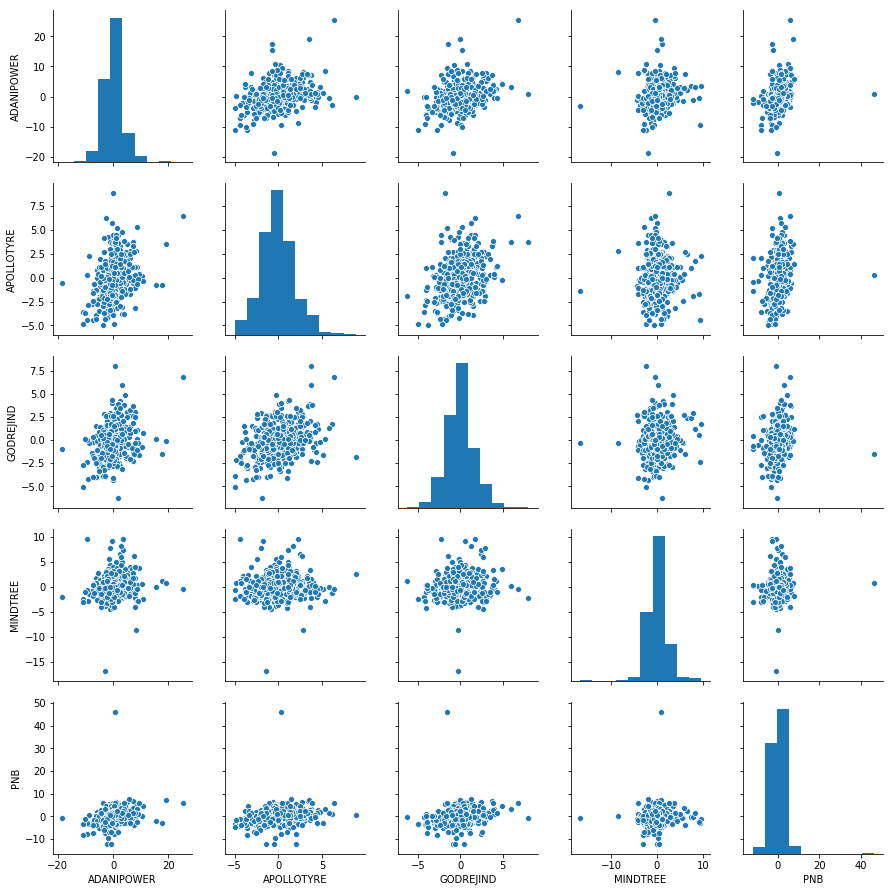

In [8]:
sns.pairplot(dfnew)
plt.show()

In [9]:
rol_avg = dfnew['ADANIPOWER'].rolling(7).mean()
rol_avg = pd.DataFrame(data = rol_avg)

In [10]:
type(rol_avg)

pandas.core.frame.DataFrame

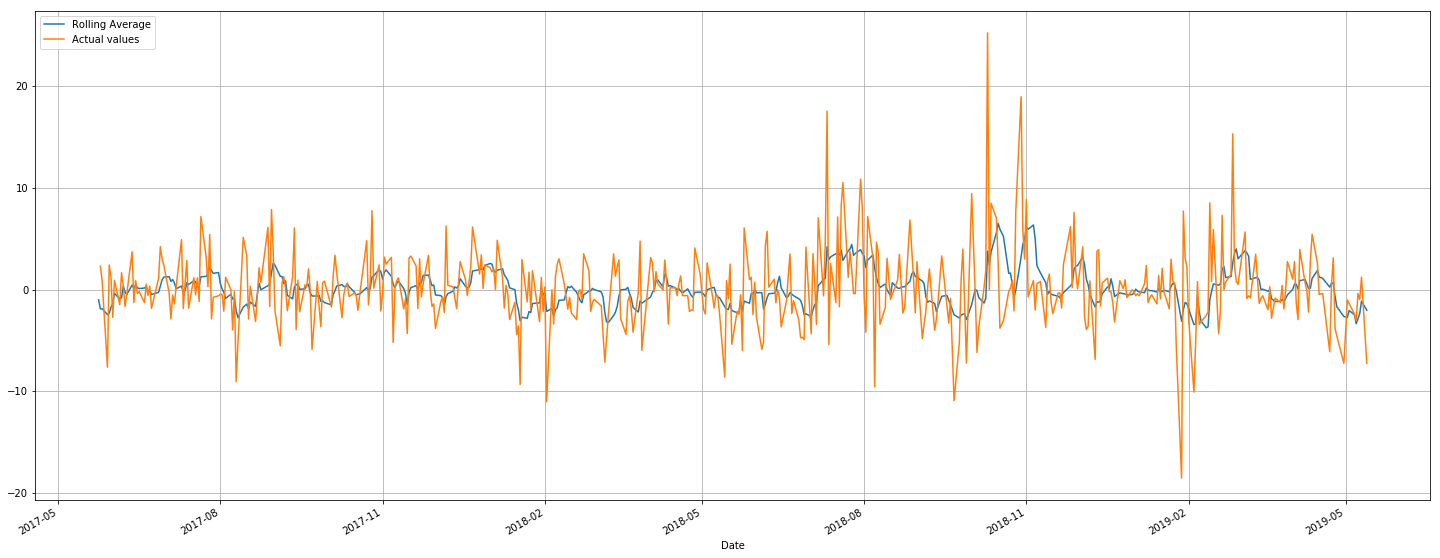

In [11]:
rol_avg['ADANIPOWER'].plot(grid = True, figsize = (25, 10), legend= True, label = "Rolling Average")
plt.plot(dfnew['ADANIPOWER'][7:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

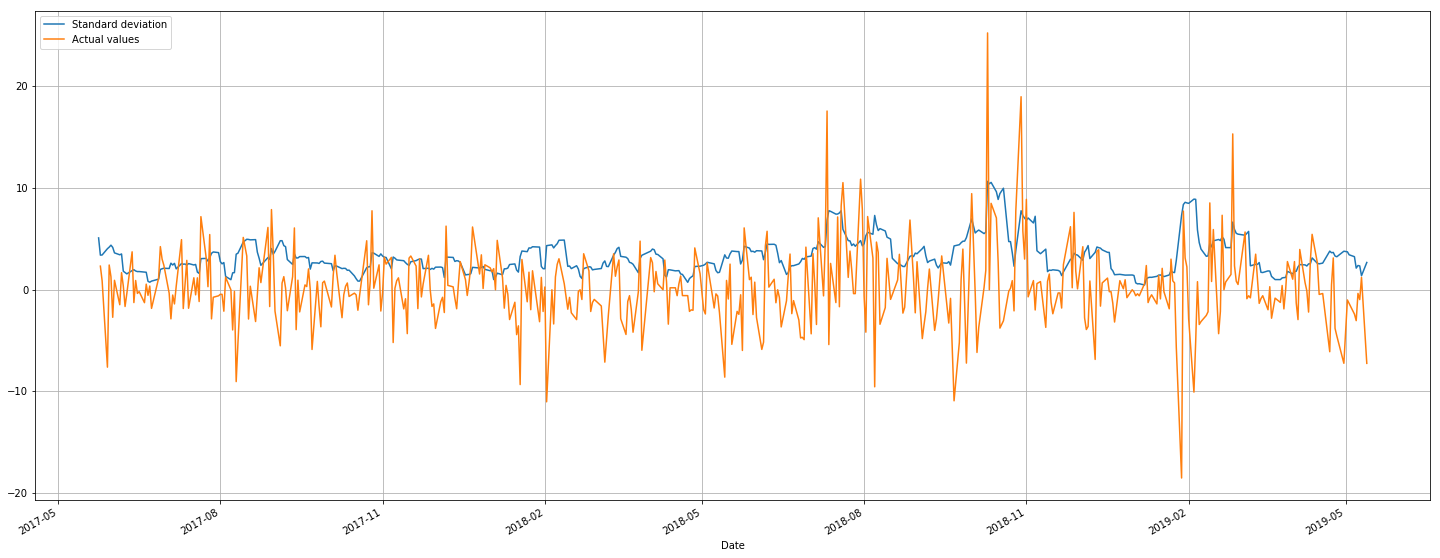

In [12]:
std = dfnew['ADANIPOWER'].rolling(7).std()
std = pd.DataFrame(data = std)
std['ADANIPOWER'].plot(grid =  True, figsize = (25, 10), legend = True, label = "Standard deviation")


plt.plot(dfnew['ADANIPOWER'][7:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

In [13]:
nif = pd.read_csv('Nifty50.csv', parse_dates=True, index_col= "Date" )
nif1 = nif.copy()
nif1.head(3)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23


In [14]:
nif1.drop(columns= ['Open', 'High', 'Low', 'Shares Traded' , 'Turnover (Rs. Cr)'], inplace= True)
nif1.head(3)

,Close
Date,
2017-05-15,9445.40
2017-05-16,9512.25
2017-05-17,9525.75


In [15]:
nif1.columns = ['Nifty']
nif1.head(3)

,Nifty
Date,
2017-05-15,9445.40
2017-05-16,9512.25
2017-05-17,9525.75


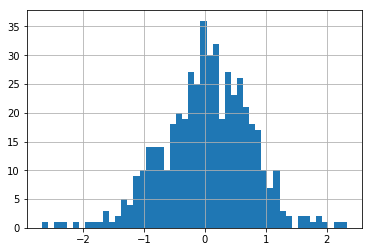

In [16]:
nifnew = nif1.pct_change()* 100
nifnew["Nifty"].hist(bins = 50)

In [17]:
nifnew.dropna(inplace=True)

In [18]:
df_fin = dfnew['ADANIPOWER'].to_frame().join(nifnew['Nifty'])
df_fin.head(3)

,ADANIPOWER,Nifty
Date,,
2017-05-16,8.595041,0.707752
2017-05-17,0.761035,0.141922
2017-05-18,-3.625378,-1.010944


In [19]:
vol = df_fin.rolling(7).std() * np.sqrt(7)

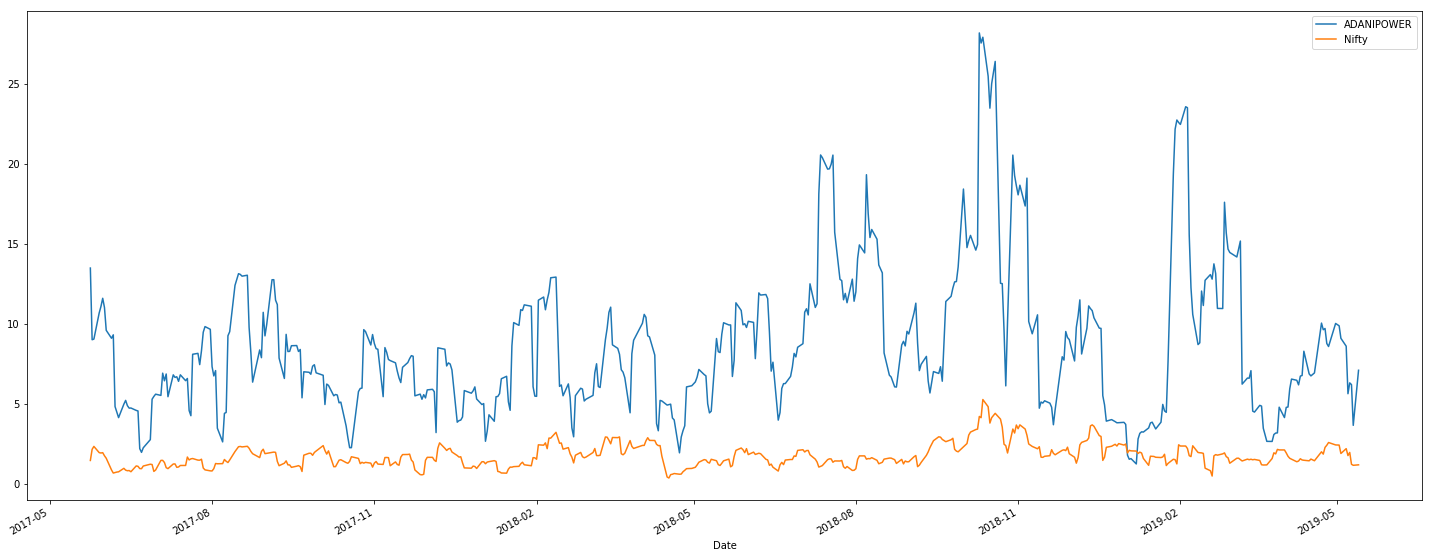

In [20]:
vol.plot(figsize=(25, 10))

In [21]:
rolling_meana.head(3)

NameError: name 'rolling_meana' is not defined

In [26]:
rolling_mean['FOR21'] = dfnew['ADANIPOWER'].rolling(window=21).mean()
rolling_mean['FOR34'] = dfnew['ADANIPOWER'].rolling(window=34).mean()
                     

plt.figure(figsize=(25,10))
plt.plot(rolling_mean['FOR21'], "g", label="Rolling mean trend for 21 days")
plt.plot(rolling_mean['FOR34'], "b", label="Rolling mean trend for 34 days")

#plt.plot(dfnew['ADANIPOWER'][21:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

NameError: name 'rolling_mean' is not defined

In [24]:
rolling_meana = pd.DataFrame(data= rolling_meana, columns= ['ADANIPOWER'])
rolling_meanb = pd.DataFrame(data = rolling_meanb, columns= ['ADANIPOWER'])
rolling_meana.head(3)

,ADANIPOWER
Date,
2017-05-16,NaN
2017-05-17,NaN
2017-05-18,NaN


KeyError: 'ADANIPOWER'

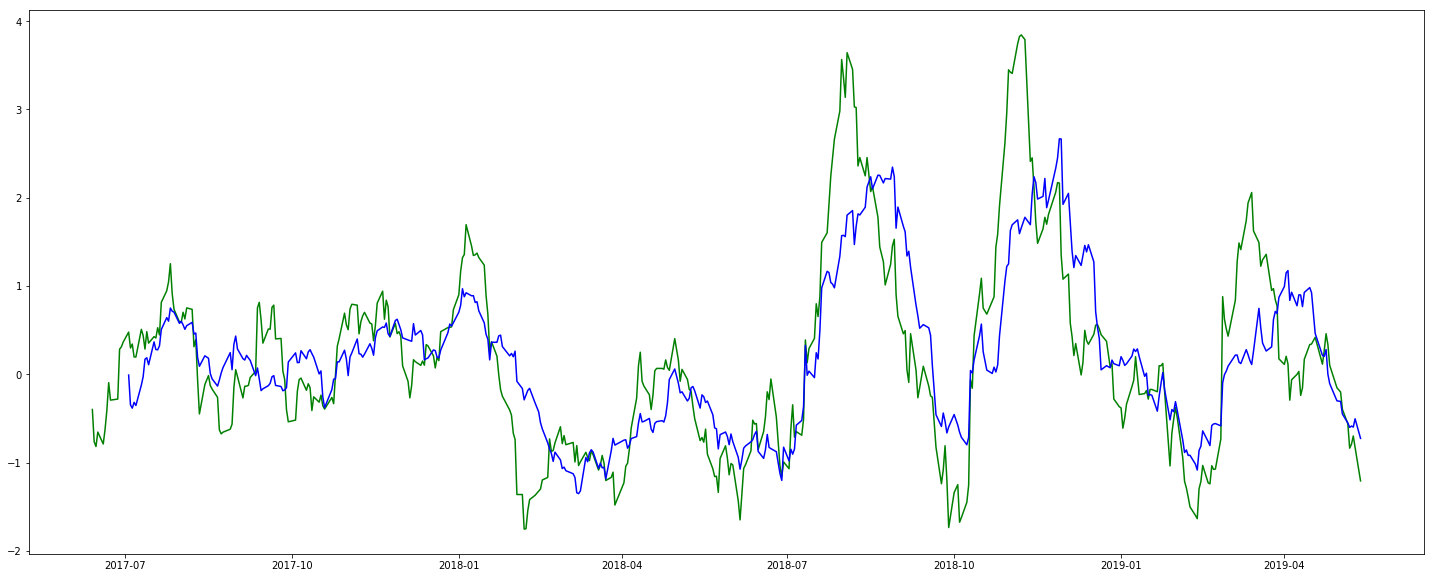

In [25]:
rolling_meana = dfnew['ADANIPOWER'].rolling(window=21).mean()
rolling_meanb = dfnew['ADANIPOWER'].rolling(window=34).mean()
                     

plt.figure(figsize=(25,10))
plt.plot(rolling_meana, "g", label="Rolling mean trend for 21 days")
plt.plot(rolling_meanb, "b", label="Rolling mean trend for 34 days")

# Save moving averages for the day before
prev_short_mavg = rolling_meana['ADANIPOWER'].shift(1)
prev_long_mavg = rolling_meanb['ADANIPOWER'].shift(1)

anomalies1 = data.ix[(rolling_meana['ADANIPOWER'] <= rolling_meanb['ADANIPOWER']) & (prev_short_mavg >= prev_long_mavg)]
anomalies2 = data.ix[(rolling_meana['ADANIPOWER'] >= rolling_meanb['ADANIPOWER']) & (prev_short_mavg <= prev_long_mavg)]


plt.plot(anomalies1, "ro", markersize=7, label = 'CALL SELL')
plt.plot(anomalies2, "v", markersize=7, label = "CALL BUY")

plt.legend(loc="upper left")
plt.grid(True)

In [66]:
df = dfnew[['ADANIPOWER']].copy()
df.head(3)

,ADANIPOWER
Date,
2017-05-16,8.595041
2017-05-17,0.761035
2017-05-18,-3.625378


In [67]:
# calculate Simple Moving Average with 20 days window
sma = dfnew["ADANIPOWER"].rolling(window=20).mean()

# calculate the standar deviation
rstd = dfnew["ADANIPOWER"].rolling(window=20).std()

sma = pd.DataFrame(data = sma)
rstd = pd.DataFrame(data = rstd)

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band.columns = ['upper']
lower_band.columns = ['lower']

In [75]:
lower_band.head(3)

,lower
Date,
2017-05-16,NaN
2017-05-17,NaN
2017-05-18,NaN


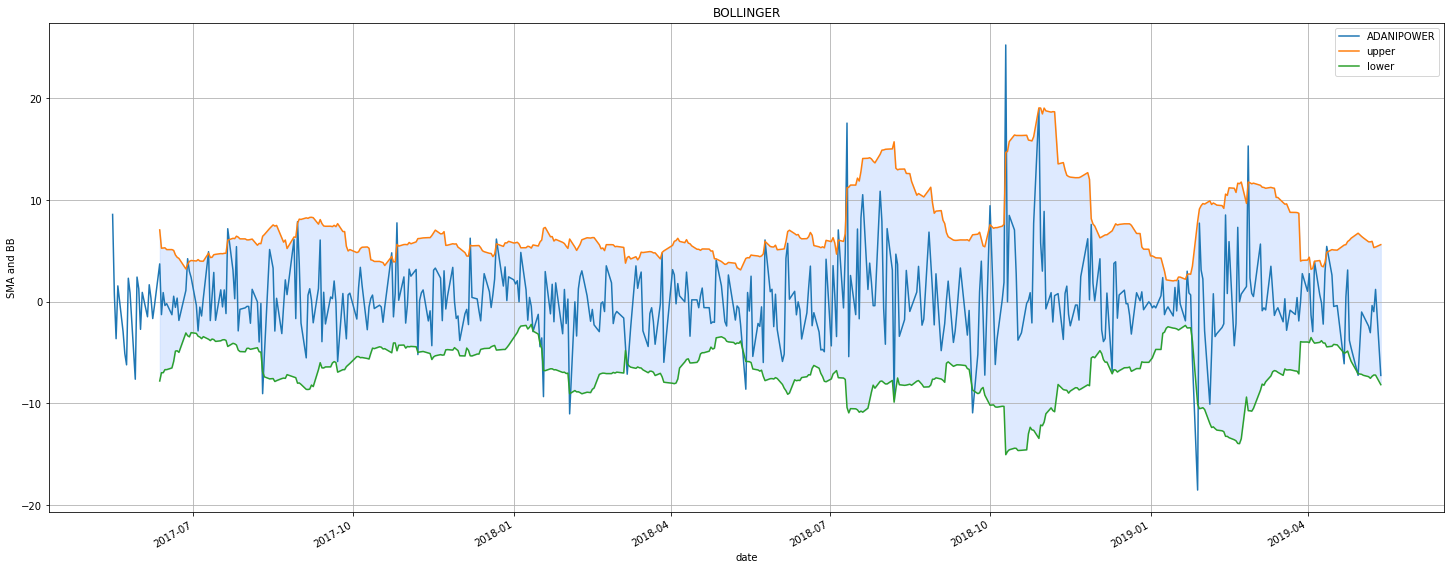

In [83]:
#df = df.join(upper_band).join(lower_band)
#df.merge(upper_band, lower_band, right_index= True, left_index= True)

pd.merge(pd.merge(df,upper_band,on='Date'),lower_band,on='Date')


ax = df.plot(title='BOLLINGER', figsize=(25, 10))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()